# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 9</span>


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import Normalize
import os
import imageio
from IPython.display import Image as IPImage, display
import io
from PIL import Image

colors = sns.color_palette("hls", 8)   # Colors
title_size = 24                        # Size title
axis_size = 18                         # Size axis label
value_size = 16                        # Size values on axis
legend_size = 16                       # Size legend

### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the $n^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

**Alteratively**, we can express a possible path also via a configuration of a $N\times N$ 2D *Ising-like* model with the following bonds:
1. any row must have one and at most one up spin
2. any column must have one and at most one up spin,

all the other spins are down.

We can represent such a configuration with a $N\times N$ matrix whose elements are 1 (spin up) or 0 (spin down); for example, in the case of a TSP with 5 cities:
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0\\
\end{bmatrix}
$$

You can interpret this matrix in the following way:
- column index represents time of visit: first colum = first visit, etc.
- row index represents the ordered sequence of cities: first row = first city, etc.

the previous matrix thus refers to the following sequence:

$$
\vec{x}_1, \vec{x}_2, \vec{x}_3, \vec{x}_4, \vec{x}_5 = 
\vec{c}_{1}, \vec{c}_{3}, \vec{c}_{5}, \vec{c}_{4}, \vec{c}_{2}
$$

and thus to the following *cost* of the path:

$$
L^{(2)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3|^2 + |\vec{c}_3-\vec{c}_5|^2 + |\vec{c}_5-\vec{c}_4|^2 +
|\vec{c}_4-\vec{c}_2|^2 + |\vec{c}_2-\vec{c}_1|^2
$$

or
$$
L^{(1)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3| + |\vec{c}_3-\vec{c}_5| + |\vec{c}_5-\vec{c}_4| +
|\vec{c}_4-\vec{c}_2| + |\vec{c}_2-\vec{c}_1|
$$


Note that, for this *ising-like* representation any particular permutation of the ordered sequence of cities can be obtained by a sequence of multiple pair permutations among rows and/or among columns.

**Warm suggestion: by using the 1D representation** (but you can work with the representation you prefer or the one you are able to invent) ...

## Exercise 09.1
### Assignment

Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!

Apply your code to the optimization of a path among 

- 34 cities randomly placed **on** a circumference
- 34 cities randomly placed **inside** a square

Show your results via:

- a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm
- a picture of the best path in cartesian coordinates

### Resolution

To resolve the TSP, I implemented a code class structured as follows:
- The `Position` class allows defining the positions of the cities as a `vector<double>`. This class contains all the methods useful for modifying and working with the positions of the cities.
- The `City` class allows defining a city with its position and an index that identifies the city itself.
- The `Travel` class allows defining a travel as a `vector<City>`. This class contains useful methods, including one that calculates the cost function (`double Travel :: L_2()`) defined above.
- The `TSP` class allows defining a TSP problem with a `vector<Travel>` that represents a generation. This class contains the `void TSP :: Evolution()` method that allows evolving the population of the chosen number of generations.

Each generation is created starting from the previous one using the `vector<Travel> New_generation()` function, which uses a `for` loop to create new individuals as follows:

```cpp
//...//
vector<Travel> new_generation;  // New generation of travels
for (int i = 0; i < int(travels.size()); i ++)  // Loop over number of individuals of each generation
{
    Travel son;
    vector<Travel> parents = Selection(rn, travels);  // Selection of parents according to cost function
    // Crossover
    if (rn.Rannyu() < prob_cross)
        parents = Crossover(rn, parents);
    // Son generation choosing randomly between the parents
    if(floor(rn.Rannyu(0, 2)))
        son = parents[0];
    else
        son = parents[1];
    // Pair permutation
    if (rn.Rannyu() < prob_pair_perm)
        son = Pair_permutation(rn, son);
    // Shift of block of cities
    if (rn.Rannyu() < prob_shift)
        son = Shift(rn, son);
    // Block permutation
    if (rn.Rannyu() < prob_block_perm)
        son = Block_permutation(rn, son);
    // Inversion
    if (rn.Rannyu() < prob_inv)
        son = Inversion(rn, son);
    son.Check_travel();  // Check if each city is present one and only one time
    new_generation.push_back(son);  // Add new individual to the new generation
    }
```

The creation of a new individual begins by selecting two parents from the previous generation using the `vector<Travel> Selection()` function. This function extracts parents with a probability linked to their cost function $L$ as follows:

$$ p_i = \frac{L_i^{-n}}{\sum_{i=1}^N L_i^{-n}} $$

where the exponent was chosen as $n=9$ after some trials. This selection criterion ensures that probabilities do not depend solely on the ranking derived from the cost function but also take into account the values of the cost function itself.

After selection, a crossover operation, which mixes the parents' genes as explained above, is performed with a probability of `prob_cross` = 65% using the `vector<Travel> Crossover()` function.

After this, a child is created as a copy of one of the parent randomly selected. This child can undergo four different mutations with a probability of 20% (chosen after some trials) each one:

- `Travel Pair_permutation()` swaps two cities.
- `Travel Shift()` shifts a block of contiguous cities by a certain number of positions.
- `Travel Block_permutation()` swaps two blocks of cities of the same size.
- `Travel Inversion()` reverses the order of a block of contiguous cities.

Blocks can exceed the city vector dimension and restarting again from the second city of the array (the first city remains fixed). The implementation of mutations, as well as crossover and selection, is done in `gen_function.cpp` file.

After the mutations, the new individual is checked using `void Travel::Check_travel()` to ensure that all cities are present exactly once, and then it is added to the new generation.

In this exercise, the positions of the cities were sampled randomly on a circumference and within a square. The first generation was obtained by randomly extracting the indexes of the cities for each individual.

With 34 cities, I implemented a genetic algorithm with 100 individuals over 300 generations. I plotted the cost function of the best individual from each generation, as well as the mean cost function of the best half of each generation. As shown in the plots, the cost function decreases rapidly in the initial generations and then stabilizes. The cost function for the TSP on the circumference converges before than that for the TSP within the square, as expected, since the first presents an easier problem.

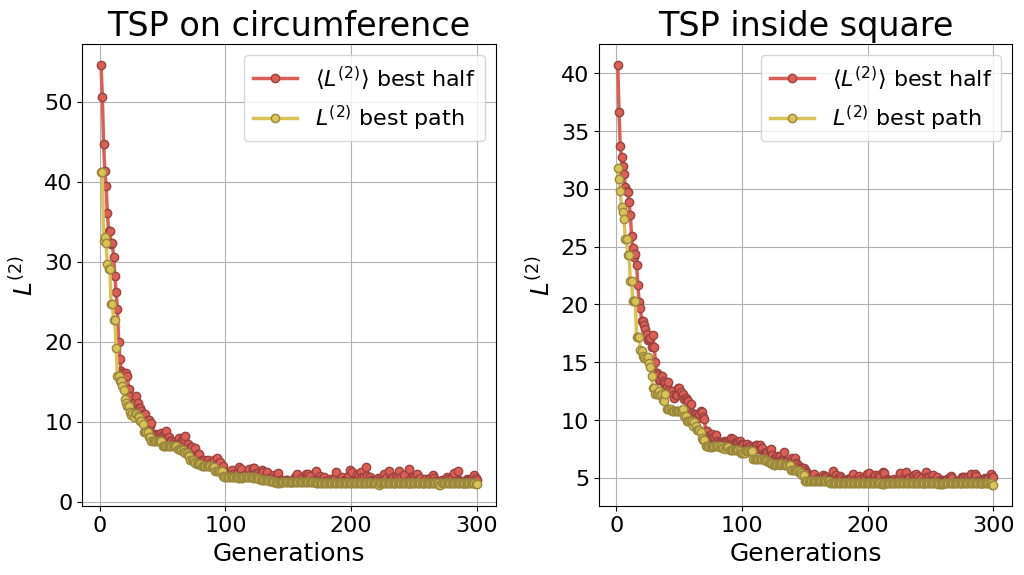

In [4]:
plt.figure(figsize=(12, 6))

file = ["c", "s"]   # List of data files

for i in range(len(file)):   # Loop over data files
    
    # Data import
    df_1 = pd.read_csv('../E09/L_half_' + file[i] + '.dat', delimiter=' ', index_col=False) 
    df_2 = pd.read_csv('../E09/L_' + file[i] + '.dat', delimiter=' ', index_col=False) 

    # Plot
    plt.subplot(1, 2, i + 1)
    plt.plot(df_1['Gen'], df_1['L'], color = colors[0], linewidth=2.5, marker='o', mec=tuple(np.array(colors[0]) * 0.7), label=r"$\left<L^{(2)}\right>$ best half")
    plt.plot(df_2['Gen'], df_2['L'], color = colors[1], linewidth=2.5, marker='o', mec=tuple(np.array(colors[1]) * 0.7), label=r"$L^{(2)}$ best path")
    if (i == 0):
        plt.title("TSP on circumference", fontsize=title_size)
    else:
        plt.title("TSP inside square", fontsize=title_size)
    plt.xlabel(r'Generations', fontsize=axis_size)
    plt.ylabel(r'$L^{(2)}$', fontsize=axis_size)
    plt.tick_params(axis='both', which='major', labelsize=value_size)
    plt.legend(fontsize=legend_size)
    plt.grid(True)

plt.subplots_adjust(wspace=0.25)

I plotted the best paths through the cities obtained at the end of the genetic algorithm. As expected, for the cities on the circumference, the travel path follows the circumference closely. For the cities within the square, it is evident that the genetic algorithm has found an optimal path. Changing the exponent $n $ in the selection operation or using a lower probability of mutations leads to finding a similar path, but with some intersections between neighboring cities. This indicates that the algorithm can find an optimal path but struggles to find the absolute best path.

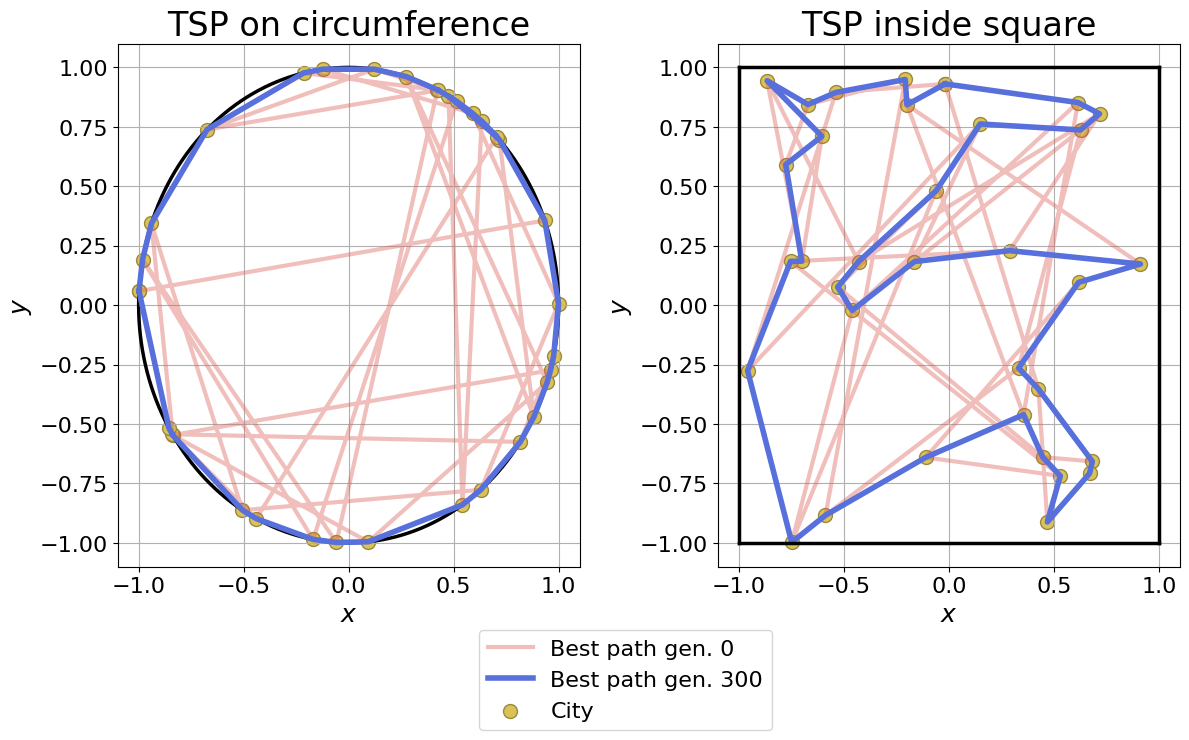

In [5]:
# Create a new figure
plt.figure(figsize=(12, 8))

# Plot TSP on circumference
plt.subplot(1, 2, 1)
df_c = pd.read_csv('../E09/Travel_c/000.dat', delimiter=' ', index_col=False)
N = 1000
x = np.cos(np.linspace(0, 2 * np.pi, N))
y = np.sin(np.linspace(0, 2 * np.pi, N))
plt.plot(x, y, color="k", linewidth=2.5)
line1, = plt.plot(df_c['x'], df_c['y'], color=colors[0], linewidth=3, alpha=0.4, label="Best path gen. 0")
scatter1 = plt.scatter(df_c['x'], df_c['y'], color=colors[1], marker='o', s=100, edgecolors=tuple(np.array(colors[1]) * 0.7), label="City")
df_c = pd.read_csv('../E09/Travel_c/300.dat', delimiter=' ', index_col=False)
line2, = plt.plot(df_c['x'], df_c['y'], color=colors[5], linewidth=4, label="Best path gen. 300")
plt.title("TSP on circumference", fontsize=title_size)
plt.xlabel(r'$x$', fontsize=axis_size)
plt.ylabel(r'$y$', fontsize=axis_size)
plt.tick_params(axis='both', which='major', labelsize=value_size)
plt.grid(True)

# Plot TSP inside square
plt.subplot(1, 2, 2)
df_s = pd.read_csv('../E09/Travel_s/000.dat', delimiter=' ', index_col=False)
plt.plot(df_s['x'], df_s['y'], color=colors[0], linewidth=3, alpha=0.4, label="Best path gen. 0")
plt.scatter(df_s['x'], df_s['y'], color=colors[1], marker='o', s=100, edgecolors=tuple(np.array(colors[1]) * 0.7), label="City")
df_s = pd.read_csv('../E09/Travel_s/300.dat', delimiter=' ', index_col=False)
plt.plot(df_s['x'], df_s['y'], color=colors[5], linewidth=4, label="Best path gen. 300")
plt.plot([1, 1], [-1, 1], 'k-', linewidth=2.5)
plt.plot([-1, -1], [-1, 1], 'k-', linewidth=2.5)
plt.plot([-1, 1], [1, 1], 'k-', linewidth=2.5)
plt.plot([-1, 1], [-1, -1], 'k-', linewidth=2.5)
plt.title("TSP inside square", fontsize=title_size)
plt.xlabel(r'$x$', fontsize=axis_size)
plt.ylabel(r'$y$', fontsize=axis_size)
plt.tick_params(axis='both', which='major', labelsize=value_size)
plt.grid(True)

# Create a unified legend
lines = [line1, line2, scatter1]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper center', bbox_to_anchor=(-0.2, -0.1), fontsize=legend_size, ncol=1)

# Adjust layout to make space for the legend
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()


I created a GIF showing the best travel path for each generation. As can be seen, in the first generations, the path quickly takes on the shape of the best path obtained at the end of the genetic algorithm, corresponding to the phase where the cost function decreases rapidly. After this phase, the path remains almost unchanged except for small adjustments between nearby cities, resulting in minor variations in the cost function. As mentioned above, changing some parameters of the algorithm prevents finding the best path and leads to small intersections between cities, which are visible in the last generations.

In [5]:
frames = []  # List to store individual frames

for i in range(0, 300, 1):  # Loop over generations
    # Extract the frame from the data
    plt.figure(figsize=(15, 6))
    df_c = pd.read_csv(f'../E09/Travel_c/{i:03d}.dat', delimiter=' ', index_col=False) 
    df_s = pd.read_csv(f'../E09/Travel_s/{i:03d}.dat', delimiter=' ', index_col=False) 

    # Plot circumference
    plt.subplot(1,2,1)
    N = 1000
    x = np.cos(np.linspace(0, 2 * np.pi, N))
    y = np.sin(np.linspace(0, 2 * np.pi, N))
    plt.plot(x, y, color = "k", linewidth=2.5)
    plt.plot(df_c['x'], df_c['y'], color = colors[5], linewidth=3, label="Path")
    plt.scatter(df_c['x'], df_c['y'], color = colors[1], marker='o', s=100, edgecolors=tuple(np.array(colors[1]) * 0.7), label = "City")
    plt.title(f"TSP on circumference generation {i}", fontsize=title_size)
    plt.xlabel(r'$x$', fontsize=axis_size)
    plt.ylabel(r'$y$', fontsize=axis_size)
    plt.tick_params(axis='both', which='major', labelsize=value_size)
    plt.legend(fontsize = legend_size)
    plt.grid(True)
    plt.gca().set_aspect('equal')    
    
    # Plot square
    plt.subplot(1,2,2)
    plt.plot(df_s['x'], df_s['y'], color = colors[5], linewidth=3, label="Path")
    plt.scatter(df_s['x'], df_s['y'], color = colors[1], marker='o', s=100, edgecolors=tuple(np.array(colors[1]) * 0.7), label = "City")
    plt.plot([1, 1], [-1, 1], 'k-', linewidth=2.5)
    plt.plot([-1, -1], [-1, 1], 'k-', linewidth=2.5)
    plt.plot([-1, 1], [1, 1], 'k-', linewidth=2.5)
    plt.plot([-1, 1], [-1, -1], 'k-', linewidth=2.5)
    plt.title(f"TSP inside square generation {i}", fontsize=title_size)
    plt.xlabel(r'$x$', fontsize=axis_size)
    plt.ylabel(r'$y$', fontsize=axis_size)
    plt.tick_params(axis='both', which='major', labelsize=value_size)
    plt.legend(fontsize = legend_size)
    plt.grid(True)
    plt.gca().set_aspect('equal')

    # Convert the plot to PIL Image object
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    img = Image.open(buf)
    frames.append(img)
    plt.close()

plt.subplots_adjust(wspace=0.6)

# Save the frames as a GIFS
animation_path = "../E09/animation.gif"
frames[0].save(animation_path, save_all=True, append_images=frames[1:], optimize=False, duration=100, loop=0)

# Display the GIF 
#display(IPImage(filename=animation_path))

<Figure size 640x480 with 0 Axes>

![Example GIF](../E09/animation.gif)